In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import spline as sp
import simulation_setup_frumkin as ss
import galva_frumkin as ga

In [2]:
df = pd.read_csv('./LMO-1C.csv', names=["capacity", "potential"])
LMO = sp.Spline_params(df)

In [3]:
LMO.iso_spline()

In [8]:
params = ss.SimulationSetup(180.815,# Mr Molecular mass of the active material, g/mol
                            2.26e-3,# m Active mass, g
                            4.58,# rho Density of the active material, g.cm-3
                            method='BI',
                            isotherm=LMO,
                           )

In [9]:
galva = ga.galva_diagram(params)

In [10]:
%%time

galva.galva_calc()

CPU times: user 5min 14s, sys: 60 ms, total: 5min 14s
Wall time: 43.8 s


<Axes: title={'center': 'DIAGRAMA ESFÉRICO'}, xlabel='log(L)', ylabel='log(Xi)'>

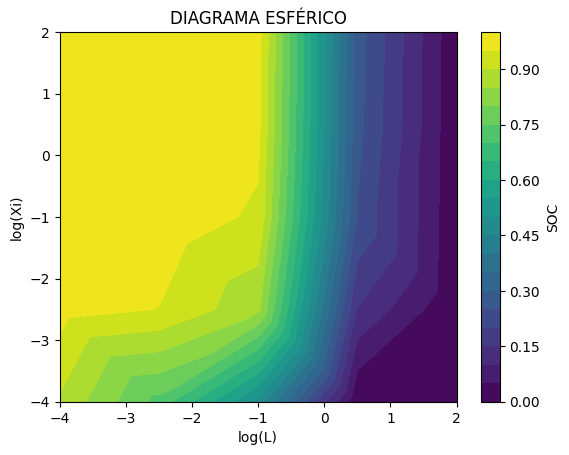

In [11]:
galva.plot()

<Axes: title={'center': 'DIAGRAMA ESFÉRICO'}, xlabel='log(L)', ylabel='log(Xi)'>

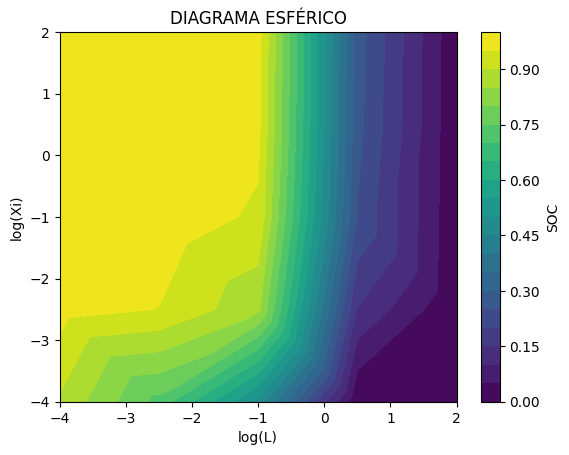

In [12]:
params2 = ss.SimulationSetup(180.815,# Mr Molecular mass of the active material, g/mol
                            2.26e-3,# m Active mass, g
                            4.58,# rho Density of the active material, g.cm-3
                            #method='BI',
                            isotherm=LMO,
                           )
galva2 = ga.galva_diagram(params2)
galva2.galva_calc()
galva2.plot()

In [17]:
galva. df

,L,Xi,Cr,d,SOC
0,0.5,-4.0,5.545605,-12.748308,7.447924e-07
1,2.0,-2.5,2.545605,-10.498308,2.567344e-03
2,2.0,-4.0,5.545605,-11.998308,7.447924e-07
3,2.0,2.0,-6.454395,-5.998308,9.073042e-03
4,2.0,0.5,-3.454395,-7.498308,8.653634e-03
5,2.0,-1.0,-0.454395,-8.998308,7.340449e-03
6,0.5,-1.0,-0.454395,-9.748308,2.471292e-01
7,0.5,2.0,-6.454395,-6.748308,2.733998e-01
8,0.5,-2.5,2.545605,-11.248308,1.477221e-01
9,0.5,0.5,-3.454395,-8.248308,2.662249e-01


In [ ]:
x = df['d']
y = df['Cr']
z = df['SOC']

# Crear el gráfico de contorno
plt.figure(figsize=(8, 6))
contour_plot = plt.tricontourf(x, y, SOCC, cmap="viridis", levels=10)

# Etiquetas de ejes y título
plt.xlabel('log(d)')
plt.ylabel('log(Cr)')
plt.title('DIAGRAMA')

# Barra de colores
plt.colorbar(contour_plot, label='SOC')

# Mostrar el gráfico
plt.show()

In [ ]:
df.to_csv('esf_100x100.csv')  

# Lineal

In [ ]:
li_path = '../../paralelo/diagramas/galva_lineal_chequeo.so'
geo = 3.0

In [ ]:
Xi = np.linspace(Xi0, Xif, NXi)
Xi = np.power(10, Xi)
L = np.linspace(L0, Lf, NL)
L = np.power(10, L)

In [ ]:
for ll in L:
    for xx in Xi:
        galva_li = gl.galva_diagram(li_path, Npx, Npt, NPOINTS, Niso, D, ks, T, Mr, m, rho, Rohm, Eoff, Qmax, geo, xx, ll, ai, bi, ci, di, capacidad)
        galva_li.galva_calc()

In [ ]:
with open('Profile-Out-L-Xi.dat', 'r') as isos:
    isos = isos.readlines()

In [ ]:
isos_proc = [ii.split() for ii in isos if '#' not in ii]

In [ ]:
iso_L = [float(ii[0]) for ii in isos_proc]
iso_Xi = [float(ii[1]) for ii in isos_proc]
iso_SOC = [float(ii[2]) for ii in isos_proc]
iso_POT = [float(ii[3]) for ii in isos_proc]

In [ ]:
isos_df = pd.DataFrame({'L':iso_L, 'Xi': iso_Xi, 'SOC':iso_SOC, 'Potencial':iso_POT})

In [ ]:
isos_df[(isos_df.L == L[0]) & (isos_df.Xi == Xi[0])].plot(x='SOC', y='Potencial')